Save a lighter version of march tweets - only date, time, state, sentiment

In [4]:
cols = 'tweetId,lang,userId,user_screen_name,year,month,date,day,hour,minute,utc_offset,text,hashtags,user_mentions,symbols,urls,emojis,sentiment,retweet_cont,favorite_count,state'.split(',')
for i,name in enumerate(cols):
    print(i, name)

0 tweetId
1 lang
2 userId
3 user_screen_name
4 year
5 month
6 date
7 day
8 hour
9 minute
10 utc_offset
11 text
12 hashtags
13 user_mentions
14 symbols
15 urls
16 emojis
17 sentiment
18 retweet_cont
19 favorite_count
20 state


In [43]:
"asda".replace('a', '')

'sd'

In [46]:
from collections import defaultdict
# load election data
results = defaultdict(int)
with open('../data/1976-2016-president.csv', 'r') as f:
    for line in f:
        if line.startswith('2016'):
            data = line.strip().split(',')
            if data[-6]=='"republican"' or data[-6]=='"democrat"':
                
                results[(data[2].replace('"', ''), data[-6].replace('"', ''))] = data[-4]
#             # if majority voted for candidate
#             if int(data[-4])/int(data[-3]) >= 0.5:
#                 results.append((data[1], data[2], data[7], int(data[-4])/int(data[-3])))
len(results)

102

In [54]:
state_vote = {}
for st in states:
    if results[(st,'republican')] + results[(st,'democrat')] == 0:
        continue
    vote = 'republican' if results[(st,'republican')] > results[(st,'democrat')] else 'democrat'
    print(st, vote)
    state_vote[st] = vote


AL democrat
AK republican
AZ democrat
AR republican
CA democrat
CO democrat
CT democrat
DE democrat
DC democrat
FL republican
GA republican
HI democrat
ID republican
IL democrat
IN republican
IA republican
KS republican
KY democrat
LA democrat
ME democrat
MD democrat
MA democrat
MI republican
MN democrat
MS republican
MO republican
MT republican
NE republican
NV democrat
NH democrat
NJ democrat
NM democrat
NY democrat
NC republican
ND democrat
OH republican
OK republican
OR republican
PA republican
RI democrat
SC democrat
SD republican
TN democrat
TX republican
UT republican
VT republican
VA democrat
WA democrat
WV republican
WI republican
WY democrat


In [23]:
states = ["AL","AK","AS","AZ","AR","CA","CO","CT","DE","DC",
          "FM","FL","GA","GU","HI","ID","IL","IN","IA","KS",
          "KY","LA","ME","MH","MD","MA","MI","MN","MS","MO",
          "MT","NE","NV","NH","NJ","NM","NY","NC","ND","MP",
          "OH","OK","OR","PW","PA","PR","RI","SC","SD","TN",
          "TX","UT","VT","VI","VA","WA","WV","WI","WY", ""]
# len(states)
stateidx = {k:i for i,k in enumerate(states)}
cols = 8
rows = 8

In [19]:
def get_row(st):
    return int(stateidx[st.strip()]/cols)
def get_col(st):
    return int(stateidx[st.strip()]%cols)

get_row('CT'), get_col('CT')

(0, 7)

In [56]:
out = open('../data/tweets.0301-0331.usa.light.csv', 'w')
out.write('tweetId,year,month,date,day,hour,minute,sentiment,state,2016Vote,rowidx,colidx\n')

with open('../data/tweets.0301-0331.usa.csv', 'r') as f:
    for line in f:
        if line.startswith('tweetId'):
            continue
        data = line.split(',')
        if len(data) != 21:
            continue
        
        state = data[20].strip()
        if state not in states:
            continue
            
        writeout = [data[0], data[4], data[5], data[6], 
                    data[7], data[8], data[9], data[17], 
                    state, state_vote[state] if state in state_vote else '', str(get_row(state)), str(get_col(state))]

        out.write(','.join(writeout) + '\n')



In [21]:
from collections import Counter
import json

state_tweet_counts = Counter()

with open('../data/tweets-march/json/tweets.0301-0331.jsonl', 'r') as f:
    for line in f:
        data = json.loads(line)
        state_tweet_counts[data['location']] += 1

In [23]:
# add retweets
with open('../data/retweets.0301-0331.usa.jsonl', 'r') as f:
    for line in f:
        data = json.loads(line)
        state_tweet_counts[data['location']] += 1

In [24]:
state_tweet_counts.most_common()

[('CA', 1425110),
 ('TX', 838376),
 ('NY', 707983),
 ('FL', 678174),
 ('', 490111),
 ('IN', 374297),
 ('WA', 372534),
 ('PA', 296712),
 ('OH', 288434),
 ('IL', 285952),
 ('GA', 247219),
 ('NC', 223937),
 ('MA', 221482),
 ('MI', 201060),
 ('AZ', 200843),
 ('VA', 191950),
 ('NJ', 190277),
 ('CO', 168246),
 ('OR', 165963),
 ('DC', 163641),
 ('TN', 149605),
 ('MD', 141383),
 ('LA', 139349),
 ('MO', 123324),
 ('MN', 117029),
 ('SC', 111035),
 ('AL', 108215),
 ('NV', 104269),
 ('CT', 97547),
 ('WI', 86815),
 ('DE', 76213),
 ('NH', 75582),
 ('KY', 75284),
 ('OK', 64896),
 ('KS', 60344),
 ('ME', 54817),
 ('UT', 47931),
 ('IA', 46576),
 ('AR', 42114),
 ('NM', 41314),
 ('NE', 37984),
 ('HI', 34836),
 ('MS', 34769),
 ('ID', 31071),
 ('WV', 27051),
 ('MT', 26293),
 ('RI', 25537),
 ('AK', 22494),
 ('VT', 16733),
 ('SD', 11334),
 ('WY', 9323),
 ('ND', 8713),
 ('İN', 1)]

### Sentiment By Date for D3

Reformat the sentiment file again for imprt to D3

In [19]:
# Cleanup and combine retweet files
import os, json

for file in os.listdir('../data/retweets-march'):
    if file.endswith('0331.jsonl'):
        print(file)
#         retweets  = []
        with open(os.path.join('../data/retweets-march', file), 'r') as f:
            for line in f:
                data = json.loads(line)
                # reformat from string into json
                data['retweeted_status'] = json.loads(data['retweeted_status'])
#                 retweets.append(data)
                
                with open('../data/retweets.0301-0331.usa.jsonl', 'a') as f:
#                     for rt in retweets:
                    f.write(json.dumps(data) + '\n')

retweets.0322-0331.jsonl


In [26]:
from collections import defaultdict, Counter

In [48]:
by_state_by_day = defaultdict(lambda: defaultdict(lambda: defaultdict(int)))
vals_by_state_by_day = defaultdict(lambda: defaultdict(list))
# TODO: average with window = 2days?

with open('../data/tweets.0301-0331.usa.light.csv', 'r') as f:
    for line in f:
        if line.startswith('tweetId'):
            continue
        
        data = line.split(',')
        state = data[-4]
        sentiment = float(data[-5])
        date = int(data[3])
        
        by_state_by_day[state][date]['sentiment'] += sentiment
        by_state_by_day[state][date]['total'] += 1
        
        by_state_by_day['ALL'][date]['sentiment'] += sentiment
        by_state_by_day['ALL'][date]['total'] += 1
        
        vals_by_state_by_day[state][date].append(sentiment)
        vals_by_state_by_day['ALL'][date].append(sentiment)
        

**Loading new jsonl file format + Retweets**

In [155]:
n = 0
tmp = []
pos_tok = Counter()
neg_tok = Counter()

with open('../data/tweets-march/json/tweets.0301-0331.jsonl', 'r') as f:
    for line in f:
        data = json.loads(line)
        
        sentiment = data['sentiment']
        date = data['date']
        state = data['location']
        tweet = data['text']
        
        emojis = data['emojis']
        tokens = tweet.lower().strip().split()
        
        if sentiment > 0.5:
            for t in tokens:
                pos_tok[t] += 1
            for e in emojis:
                pos_tok[e] += 1
                
        if sentiment < -0.5:
            for t in tokens:
                neg_tok[t] += 1
            for e in emojis:
                neg_tok[e] += 1
        
        tmp.append((tweet, date, state, sentiment))
        
        
#         if abs(sentiment) > 0.8:
#             print(tweet, date, state, sentiment)
#             print()
#             n+=1
            
#             if n > 50:
#                 break
        

In [149]:
sorted(tmp, key=lambda x:x[-1])[:30]

[('Corona virus is honestly fucking with us now  they’ve cancelled Formula 1 😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭💔💔💔💔💔💔💔💔💔💔💔💔💔💔💔💔💔💔💔💔💔💔💔💔💔💔💔💔💔',
  13,
  'ME',
  -0.9994),
 ('@Kristenn_2 Hey lets HATE   HATE   HATE   HATE   HATE   HATE   HATE   HATE   HATE   HATE   HATE   HATE   HATE   HATE   HATE   HATE   HATE   HATE   HATE   HATE   HATE   HATE   HATE   HATE   HATE   HATE   HATE   HATE   HATE   HATE   HATE   HATE  Trump. That will sure get rid of Coronavirus.',
  21,
  'AR',
  -0.9994),
 ('This covid19 dick fuckin me so hard 😫😫😫😫😫😫😫😫😫😫😫😫😫😫😫😫😫😫😫😫😫😫😫😫😫😫😫😫😫😫😫😫😫😫😫😫😫😫😫😫😫😫😫😫😫😫😫😫😪',
  26,
  'OH',
  -0.9992),
 ("@JamesRHarrigan \U0001f97a😢😱😢\U0001f97a😢😱😢\U0001f97a😱😢\U0001f97a😢😱😢\U0001f97a😢😱😢\U0001f97a😢😱😢\U0001f97a😢😱😢\U0001f97a😢😱😢\U0001f97a Screw Corona Virus!  Without sports  I might as well be dead!  I'm taking to YOU @marchmadness @NCAA @pac12 @MLB @NBA @Pac12Network @Rjeff24 @xfl2020 @espn 💔\U0001f92c💔\U0001f92c💔\U0001f92c💔\U0001f92c💔\U0001f92c💔\U0001f92c",
  14,
  'AZ',
  -0.9988),
 ("Tiffany Young O

In [152]:
"Blessings 🙏🙏😇🙏🙏 all.".split()

['Blessings', '🙏🙏😇🙏🙏', 'all.']

In [151]:
sorted(tmp, key=lambda x:x[-1], reverse=True)[:100]

[('@HustusMichael @davidf4444 @Jones17Charlene @Jeanetteisback @LindaSt18683783 @PersevereEver @Mattytwo2 @Lynda63986855 @MaxGibs62013817 @Ley_Mouse @Quin4Trump @realTrumpSquad @suzor_david @traveler002 @JACKLARKIN1 @MarlaineDettlo1 @RobertP60779724 @richard_landes @my2gr8girls @MemeMercenary @kit_bramat @realalvel @lcook74 @LivingDeadNerd @Scott73132483 @Lawsen_Webb @Islandworlds1 @Dannybr18041504 @ItsOnlyDawn @ReElect20 @dannybr57097439 @tneeb475 @usvetram @Whiskey100Proof @MJoeTeedoff @renowncook @velezusmc @stlpcs @Jali_Cat @MischievousLiz @AngelWarrior321 @The_Bull_1 @MelanieMetz6 @RPowell2011 @Jana__Howser @chuck_rowland @Dawson6211 @tagruber @Italianmike @AskmoreNorman 😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄 So I hear your taking a cruise to Wuhan to see this guy? 🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣',
  10,
  'NJ',
  0.9999),
 ('@GOP @realDonaldTrump @Mike_Pence 🤣😂😆😂🤣😂😆😂🤣😂😆😂🤣😂😆😂🤣😆😆😂🤣😂😆😆😂🤣😂😆😆🤣🤣😆😆😆🤣🤣😂😆😆😂🤣🤣😆😆😆😂😂😂😆😆😂🤣😂😆😆😂🤣😆😆😂🤣🤣😆😆🤣🤣😂😆😆🤣😂😆😆🤣🤣😂😂😆😂😂🤣🤣😆😂😆😂🤣😂😆😂😆😆😆🤣😂😂🤣🤣😆😂Before or after t

In [122]:
# by_state_by_day = defaultdict(lambda: defaultdict(lambda: defaultdict(int)))
# vals_by_state_by_day = defaultdict(lambda: defaultdict(list))

# TWEETS
# print("Loading Tweets...")
# with open('../data/tweets-march/json/tweets.0301-0331.jsonl', 'r') as f:
#     for line in f:
#         data = json.loads(line)
#         state_tweet_counts[data['location']] += 1
        
#         sentiment = data['sentiment']
#         date = data['date']
#         state = data['location']
        
#         by_state_by_day[state][date]['sentiment'] += sentiment
#         by_state_by_day[state][date]['total'] += 1
        
#         by_state_by_day['ALL'][date]['sentiment'] += sentiment
#         by_state_by_day['ALL'][date]['total'] += 1
        
#         vals_by_state_by_day[state][date].append(sentiment)
#         vals_by_state_by_day['ALL'][date].append(sentiment)

# print("done")
re_by_state_by_day = defaultdict(lambda: defaultdict(lambda: defaultdict(int)))
re_vals_by_state_by_day = defaultdict(lambda: defaultdict(list))

print("Loading Retweets")
with open('../data/retweets.0301-0331.usa.jsonl', 'r') as f:
    for line in f:
        data = json.loads(line)
        
        sentiment = data['retweeted_status']['sentiment']
        date = data['date']
        state = data['location']
        
        re_by_state_by_day[state][date]['sentiment'] += sentiment
        re_by_state_by_day[state][date]['total'] += 1
        
        re_by_state_by_day['ALL'][date]['sentiment'] += sentiment
        re_by_state_by_day['ALL'][date]['total'] += 1
        
        re_vals_by_state_by_day[state][date].append(sentiment)
        re_vals_by_state_by_day['ALL'][date].append(sentiment)
        
print("done")

Loading Retweets
done


**Apply Smoothing to increase statistical significance**

In [52]:
import math
def get_bins(arr, size):
    bins = defaultdict(list)
    for i, el in enumerate(arr):
        bins[math.floor(i/size)].append(el)
    print(bins)
    idxmap = {}
    for k,v in bins.items():
        center = np.mean(v)
        for el in v:
            idxmap[el] = center
    return idxmap
get_bins(np.arange(31), 5)

defaultdict(<class 'list'>, {0: [0, 1, 2, 3, 4], 1: [5, 6, 7, 8, 9], 2: [10, 11, 12, 13, 14], 3: [15, 16, 17, 18, 19], 4: [20, 21, 22, 23, 24], 5: [25, 26, 27, 28, 29], 6: [30]})


{0: 2.0,
 1: 2.0,
 2: 2.0,
 3: 2.0,
 4: 2.0,
 5: 7.0,
 6: 7.0,
 7: 7.0,
 8: 7.0,
 9: 7.0,
 10: 12.0,
 11: 12.0,
 12: 12.0,
 13: 12.0,
 14: 12.0,
 15: 17.0,
 16: 17.0,
 17: 17.0,
 18: 17.0,
 19: 17.0,
 20: 22.0,
 21: 22.0,
 22: 22.0,
 23: 22.0,
 24: 22.0,
 25: 27.0,
 26: 27.0,
 27: 27.0,
 28: 27.0,
 29: 27.0,
 30: 30.0}

In [63]:
import math
def get_bins(arr, size):
    bins = defaultdict(list)
    for i, el in enumerate(arr):
        bins[math.floor(i/size)].append(el)
    idxmap = {}
    for k,v in bins.items():
        center = np.mean(v)
        for el in v:
            idxmap[el] = center
    return idxmap
    
def smooth(vals, size=2):
    """
    SIZE = num days to smooth
    """
    dates = np.arange(1,32)
    datebins = get_bins(dates, size)
    smoothed = defaultdict(lambda: defaultdict(list))
    for state in vals:
        for date in dates:
            smoothed[state][datebins[date]] += vals[state][date]
    return smoothed
        

In [119]:
vals_by_state_w2 = smooth(vals_by_state_by_day, size=2)

In [123]:
re_vals_by_state_w2 = smooth(re_vals_by_state_by_day, size=2)

In [124]:
len(re_vals_by_state_w2['TX'][3.5])

227494

**Check for Statistical Significance**

In [29]:
from scipy import stats
import numpy as np
from matplotlib import pyplot as plt

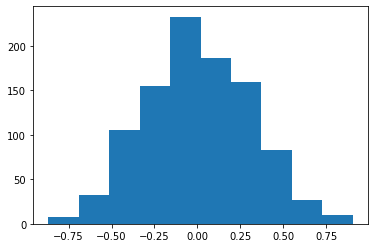

In [86]:
mu, sigma = 0, 0.3
plt.hist(np.random.normal(mu, sigma, 1000))
plt.show()

In [108]:
def check_sig(vals):
    sig_by_state_by_date = defaultdict(lambda: defaultdict(float))
    for state in vals:
#         for date in range(1,32):
        for date in vals[state]:
#             print(state, date)
            tmp = vals[state][date]
            
#             control = np.random.uniform(-1.0, 1.0, len(tmp))

            mu, sigma = 0, 0.3
            control = np.random.normal(mu, sigma, len(tmp))

            s,p = stats.ttest_ind(tmp, control)

            sig_by_state_by_date[state][date] = p
    
    return sig_by_state_by_date
        
        
# stats.ttest_ind([-0.2,0.2],[0,0])

In [79]:
[print(len(vals_by_state_w2['CA'][x])) for x in vals_by_state_w2['CA'].keys()]

20674
42009
11972
10651
9359
8492
6873
6834
6877
8154
6791
7657
8801
8818
8440
4983


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [110]:
sig_by_state_w2 = check_sig(vals_by_state_w2)

In [125]:
re_sig_by_state_w2 = check_sig(re_vals_by_state_w2)

In [128]:
re_sig_by_state_w2['ALL']

defaultdict(float,
            {1.5: 0.0,
             3.5: 0.0,
             5.5: 0.0,
             7.5: 0.0,
             9.5: 0.0,
             11.5: 0.0,
             13.5: 0.0,
             15.5: 4.204489771511841e-69,
             17.5: 0.0,
             19.5: 0.0,
             21.5: 2.8016111381165342e-95,
             23.5: 6.23976893099743e-116,
             25.5: 2.0385757346917263e-36,
             27.5: 1.778286332366897e-95,
             29.5: 0.0,
             31.0: 1.942624880747263e-221})

In [136]:
sig_by_state_w2['TX'][1.5]

3.044757257771858e-60

In [94]:
sig_by_state_by_date['WA']

defaultdict(float,
            {1: 8.37161672395143e-298,
             2: 1.67820657139818e-23,
             3: 4.662670843125251e-138,
             4: 2.0475477302164143e-23,
             5: 1.4795551757358696e-17,
             6: 1.121970332681647e-36,
             7: 7.748231503747326e-40,
             8: 3.0534023073078454e-18,
             9: 9.798466322399351e-20,
             10: 6.773215787567054e-06,
             11: 2.5948320798268186e-08,
             12: 1.0265110522365345e-06,
             13: 7.161396642378775e-07,
             14: 0.023679135420804125,
             15: 0.5080596172280296,
             16: 0.7712707498889773,
             17: 0.17112651657150912,
             18: 0.03815094836792747,
             19: 0.00010791333927676138,
             20: 0.004019454327570808,
             21: 0.10843561039157751,
             22: 0.24466093201102326,
             23: 0.6187186759763807,
             24: 0.014818745141915947,
             25: 0.3255663913642647,
       

In [35]:
for state in by_state_by_day:
    for date in by_state_by_day[state]:
        if by_state_by_day[state][date]['total'] > 0:
            by_state_by_day[state][date]['sentiment'] /= by_state_by_day[state][date]['total']


In [36]:
# get row, col values for each state
# grid map layout from https://bl.ocks.org/officeofjane/2c3ed88c4be050d92765de912d71b7c4
state_rc = {}
with open('../data/publications_grid.csv', 'r') as f:
    for line in f:
        if line.startswith('id'):
            continue
        
        row = line.strip().split(',')
        pub = row[1]
        if pub == 'New York Times 2':
            state = row[-3]
            r = int(row[-1])
            c = int(row[-2])

            state_rc[state] = (r,c)
state_rc['ALL'] = (0,0)

In [141]:
with open('../data/tweets-smoothed.0301-0331.usa.sentiment.d3.csv', 'w') as f:
    f.write('state,date,sentiment,p25,p75,median,total,row,col,pval\n')
    for state in vals_by_state_w2:
        if state not in state_rc:
            print(state)
            continue
        if len(state)==0:
            continue
#         for date in range(1,32):
        for date in sorted(vals_by_state_w2[state].keys()):
            f.write("{},{},{},{},{},{},{},{},{:.4}\n".format(
                state,date,
                np.mean(vals_by_state_w2[state][date]),
                np.percentile(vals_by_state_w2[state][date],25),
                np.percentile(vals_by_state_w2[state][date],75),
                len(vals_by_state_w2[state][date]),
                state_rc[state][0], state_rc[state][1],
                sig_by_state_w2[state][date]))


İN


In [130]:
with open('../data/retweets-smoothed.0301-0331.usa.sentiment.d3.csv', 'w') as f:
    f.write('state,date,sentiment,total,row,col,pval\n')
    for state in re_vals_by_state_w2:
        if state not in state_rc:
            print(state)
            continue
        if len(state)==0:
            continue
#         for date in range(1,32):
        for date in sorted(re_vals_by_state_w2[state].keys()):
            f.write("{},{},{},{},{},{},{:.4}\n".format(
                state,date,
                np.mean(re_vals_by_state_w2[state][date]),
                len(re_vals_by_state_w2[state][date]),
                state_rc[state][0], state_rc[state][1],
                re_sig_by_state_w2[state][date]))

In [39]:
with open('../data/tweets-retweets.0301-0331.usa.sentiment.d3.csv', 'w') as f:
    f.write('state,date,sentiment,total,row,col,pval\n')
    for state in by_state_by_day:
        if state not in state_rc:
            print(state)
            continue
        if len(state)==0:
            continue
        for date in range(1,32):
#         for date in by_state_by_day[state]:
            f.write("{},{},{},{},{},{},{:.4}\n".format(
                state,date,
                by_state_by_day[state][date]['sentiment'],
                by_state_by_day[state][date]['total'],
                state_rc[state][0], state_rc[state][1],
                sig_by_state_by_date[state][date]))
            


İN


In [44]:
a = 0.
a == 0

True

## Pos vs Neg Words by state by day

In [171]:
stopwords = set()
with open('../data/stopwords.txt', 'r') as f:
    for line in f:
        stopwords.add(line.strip())

In [175]:
words_by_state_by_day = defaultdict(lambda: defaultdict(lambda: defaultdict(Counter)))

with open('../data/tweets.0301-0331.usa.csv', 'r') as f:
    for line in f:
        if line.startswith('tweetId'):
            continue
            
        data = line.split(',')
        state = data[-1].strip()
        sentiment = float(data[-4])
        if sentiment == 0:
            continue
        else:
            sentiment = 'pos' if sentiment > 0 else 'neg'
        date = int(data[6])
        
        words = data[11].split()

#         print(state, sentiment, date, words)
#         break
        for w in words:
            if w.lower() in stopwords:
                continue
            words_by_state_by_day[state][date][sentiment][w.lower()] += 1
            words_by_state_by_day['ALL'][date][sentiment][w.lower()] += 1

In [114]:
words_by_state_by_day['CA'][15]['pos'].most_common(50)

[('the', 1171),
 ('to', 979),
 ('and', 664),
 ('a', 576),
 ('of', 506),
 ('is', 446),
 ('in', 412),
 ('for', 376),
 ('i', 369),
 ('you', 324),
 ('this', 313),
 ('are', 244),
 ('be', 227),
 ('coronavirus', 220),
 ('we', 220),
 ('that', 219),
 ('on', 203),
 ('it', 199),
 ('with', 193),
 ('have', 184),
 ('not', 178),
 ('all', 169),
 ('at', 154),
 ('like', 151),
 ('social', 147),
 ('my', 145),
 ('your', 138),
 ('people', 136),
 ('but', 133),
 ('from', 132),
 ('will', 132),
 ('if', 128),
 ('as', 128),
 ('&amp;', 121),
 ('so', 118),
 ('our', 118),
 ('how', 117),
 ('about', 117),
 ('#coronavirus', 110),
 ('can', 107),
 ('they', 106),
 ('#covidー19', 100),
 ('distancing', 100),
 ('what', 99),
 ('pandemic', 93),
 ('-', 92),
 ('out', 92),
 ('get', 92),
 ('corona', 90),
 ('just', 89)]

In [132]:
sum(words_by_state_by_day['ALL'][1]['neg'].values())

763930

In [161]:
from scipy.stats import chi2_contingency

def chi_day(data):
    
    most_pos = Counter()
    most_neg = Counter()
    
    most_pos = []
    most_neg = []
    

    Npos = sum(data['pos'].values())
    Nneg = sum(data['neg'].values())
    
    keys = set(list(data['pos'].keys()) + list(data['neg'].keys()))
    
    for key in keys:
        
        table = np.array([[data['pos'][key], Npos - data['pos'][key]],
                    [data['neg'][key], Nneg - data['neg'][key]]])
        
        chi2, p, dof, expected = chi2_contingency(table)
        if table[0,0] > expected[0,0]:
#             most_pos[key] = p
            most_pos.append((key, chi2, p, data['pos'][key]))
        else:
#             most_neg[key] = p
            most_neg.append((key, chi2, p, data['neg'][key]))
            
    return most_pos, most_neg
        
        

In [166]:
p = Counter({k:v for k,v in pos_tok.most_common(10000)})
n = Counter({k:v for k,v in neg_tok.most_common(10000)})

In [167]:
pos, neg = chi_day({'pos':p, 'neg':n})

In [168]:
sorted(pos, key = lambda x: x[1], reverse=True)[:50]

[('positive', 13701.615707663721, 0.0, 15667),
 ('😂', 12001.935700467888, 0.0, 14941),
 ('great', 6982.575238913686, 0.0, 9068),
 ('help', 6976.891350703158, 0.0, 12874),
 ('best', 6631.11096973351, 0.0, 8340),
 ('free', 6290.329254996987, 0.0, 7662),
 ('🤣', 6171.408916166182, 0.0, 6933),
 ('please', 5921.350659693262, 0.0, 11190),
 (' ', 5552.281872866918, 0.0, 51051),
 ('good', 5332.79605092614, 0.0, 11200),
 ('love', 5287.894744664676, 0.0, 6671),
 ('safe', 4715.327424132159, 0.0, 6128),
 ('thank', 4661.930562421206, 0.0, 6231),
 ('hand', 3738.6451373256828, 0.0, 5729),
 ('like', 3706.6861229928018, 0.0, 21545),
 ('hope', 3224.077112527306, 0.0, 6048),
 ('support', 3038.248291488677, 0.0, 4811),
 ('care', 2713.980923501061, 0.0, 7821),
 ('thanks', 2607.403494934797, 0.0, 3902),
 ('our', 2511.8128152067625, 0.0, 21635),
 ('better', 2267.780927102713, 0.0, 5324),
 ('friends', 2250.5947258762208, 0.0, 3532),
 ('happy', 2179.2008106869957, 0.0, 2852),
 ('share', 2148.6910095554654, 0.0,

In [169]:
sorted(neg, key = lambda x: x[1], reverse=True)[:50]

[('death', 15939.397550548729, 0.0, 17215),
 ('flu', 13483.181123937698, 0.0, 17041),
 ('the', 13270.134051985837, 0.0, 290249),
 ('coronavirus', 9439.351354703682, 0.0, 79913),
 ('no', 8688.042353525594, 0.0, 23890),
 ('is', 8597.61017744824, 0.0, 107307),
 ('people', 8445.652560707143, 0.0, 39280),
 ('crisis', 7582.511436514227, 0.0, 9125),
 ('trump', 7361.849807022984, 0.0, 25501),
 ('die', 7182.1221882647205, 0.0, 8588),
 ('sick', 7059.138655828133, 0.0, 10046),
 ('died', 7025.922792713923, 0.0, 7741),
 ('rate', 6136.857541216852, 0.0, 8928),
 ('shit', 5696.378663689514, 0.0, 7918),
 ('infected', 5362.243762148994, 0.0, 6641),
 ('bad', 4786.768718484224, 0.0, 6958),
 ('panic', 4725.220823257579, 0.0, 7126),
 ('fuck', 4688.14572713199, 0.0, 5781),
 ('000', 4614.063669356585, 0.0, 8298),
 ('stop', 4472.193662368807, 0.0, 10093),
 ('😭', 4362.509457410559, 0.0, 5535),
 ('virus', 4080.0278031541693, 0.0, 25128),
 ('kill', 3947.2111715341844, 0.0, 5331),
 ('toll', 3864.7430323092944, 0.0

In [181]:
def calc_odds(p, n):
    
    
    
    odds_pos = Counter()
    odds_neg = Counter()
    
#     odds_pos = []
#     odds_neg = []
    

    Npos = sum(p.values())
    Nneg = sum(n.values())
    
    keys = set(list(p.keys()) + list(n.keys()))
    
    for key in keys:
        if n[key]==0 or p[key]==0:
            continue
        odds_pos[key] = (p[key]/ (Nneg - n[key])) * ((Npos - p[key])/n[key])
        odds_neg[key] = (n[key]/ (Npos - p[key])) * ((Nneg - n[key])/p[key])
        
    return odds_pos, odds_neg
        

odds_pos, odds_neg = calc_odds(p, n)
    

In [188]:
# odds_neg.most_common()
for w, odds  in odds_neg.most_common()[:10]:
    print("neg,{},{}".format(w,odds))

neg,killed,50.03526894483518
neg,death,46.644988483977265
neg,3.4%,42.85621567978035
neg,😱,38.75012876905858
neg,died,37.72663266007455
neg,incompetent,32.74336940694489
neg,incompetence,32.663023331213466
neg,dead,32.09029599524789
neg,toll,29.935152304262196
neg,declares,28.07465006019771


In [187]:
for w, odds  in odds_pos.most_common()[:10]:
    print("pos,{},{}".format(w,odds))

pos,🤣,21.17884772323574
pos,excellent,18.67991802880654
pos,positive,18.240994287940477
pos,beautiful,17.640400583471042
pos,😁,16.792505012633814
pos,grateful,12.816486759242554
pos,free,12.569309366790659
pos,😂,11.2781982386306
pos,:),11.275578813986243
pos,😆,11.14753107823186


In [178]:
Npos = sum(p.values())
Nneg = sum(n.values())
    
for key in ['positive','😂', 'great', 'help', 'best', 'free', 'death', 'flu', 'coronavirus', 'people', 'crisis']:
    odds = (p[key]/ (Nneg - n[key])) * ((Npos - p[key])/n[key])
    print(key, odds)
    
print()
for key in ['positive','😂', 'great', 'help', 'best', 'free', 'death', 'flu', 'coronavirus', 'people', 'crisis']:
    odds = (n[key]/ (Npos - p[key])) * ((Nneg - n[key])/p[key])
    print(key, odds)

positive 18.240994287940477
😂 11.2781982386306
great 9.526718738806903
help 4.182379124216546
best 10.835440287495228
free 12.569309366790659
death 0.02143853032236258
flu 0.06365727759136564
coronavirus 0.47056570959583904
people 0.3652596094745808
crisis 0.05028731899888059

positive 0.05482157300280072
😂 0.08866664504750009
great 0.10496793569925808
help 0.2390983625109124
best 0.09228974305308683
free 0.07955886602983117
death 46.644988483977265
flu 15.709122944579686
coronavirus 2.1251017224754496
people 2.737778758068765
crisis 19.88572904477688


In [177]:
distinct_words_by_day = defaultdict(lambda: {'pos':[], 'neg':[]})
for date in range(1,32):
    print("{}/31".format(date), end='\r')
    pos, neg = chi_day(words_by_state_by_day['ALL'][date])
    
    distinct_words_by_day[date]['pos'] = sorted(pos, key = lambda x: x[1], reverse=True)[:50]
    distinct_words_by_day[date]['neg'] = sorted(neg, key = lambda x: x[1], reverse=True)[:50]

In [162]:
pos, neg = chi_day(words_by_state_by_day['ALL'][30])

In [188]:
distinct_words_by_day[23]

{'pos': [('support', 56.62422665149838, 5.2757828020780496e-14, 72),
  ('safe', 55.804781750555414, 8.00366317860765e-14, 83),
  ('stay', 49.93107494793437, 1.592425987522141e-12, 320),
  ('love', 41.10576413430954, 1.442104129413025e-10, 63),
  ('free', 37.79841264575133, 7.844557762844492e-10, 55),
  ('friends', 36.04857320643541, 1.9245965785043423e-09, 70),
  ('care', 35.56114898469153, 2.471683254706416e-09, 107),
  ('relief', 33.8831394573493, 5.8523682387935556e-09, 77),
  ('protect', 29.828462588545616, 4.7201129100271084e-08, 59),
  ('social', 28.94004948545202, 7.465331780186843e-08, 224),
  ('hope', 26.53405921866285, 2.5893249157177364e-07, 80),
  ('home', 25.51043399030299, 4.399969804291466e-07, 243),
  ('distancing', 23.979271376472596, 9.737846867948178e-07, 163),
  ('healthy', 22.40949784965776, 2.2028197783238015e-06, 32),
  ('share', 21.799641200901974, 3.0265672752497857e-06, 40),
  ('fun', 21.049340877001452, 4.4760680109764655e-06, 23),
  ('save', 17.5310233202474

In [158]:
sorted(pos, key = lambda x: x[1], reverse=True)[:30]
# sorted(pos, key = lambda x: x[2])

[('positive', 1882.4340378819277, 0.0),
 ('hand', 1077.815147507074, 2.1911916977234263e-236),
 ('good', 818.9305419738662, 4.133139815798582e-180),
 ('great', 730.3339309083389, 7.57859366144852e-161),
 ('amazon', 659.1384401323141, 2.2998613780958643e-145),
 ('free', 657.4063161466346, 5.4751656779412726e-145),
 ('super', 639.8910746640647, 3.528820706083418e-141),
 ('employee', 536.5947767556986, 1.0380922367896077e-118),
 ('sanitizer', 462.25142221556854, 1.5557703168176405e-102),
 ('protect', 457.20191573383806, 1.9534698999078942e-101),
 ('safe', 446.89626055884384, 3.41649118841934e-99),
 ('love', 402.91352809138556, 1.2785034143696362e-89),
 ('hope', 371.710687750589, 7.938284302718508e-83),
 ('safety', 313.55655197972095, 3.668324872434174e-70),
 ('care', 289.9467753796047, 5.106854466518821e-65),
 ('tuesday', 254.92879420950055, 2.1875556728366847e-57),
 ('support', 229.1733515655311, 9.028637249428804e-52),
 ('tests', 214.13854271510002, 1.717884483579699e-48),
 ('😂', 210.20

In [ ]:
most_rep = Counter()
most_dem = Counter()

def contingency_table(tag):
    nrep = rep[tag]
    ndem = dem[tag]
    table = np.array([[ndem, dem_total-ndem],
                    [nrep, rep_total-nrep]])
    return table

for tag in top200:
    nrep = rep[tag]
    ndem = dem[tag]
    table = np.array([[ndem, dem_total-ndem],
                    [nrep, rep_total-nrep]])
    
    chi2, p, dof, expected = chi2_contingency(table)
    if table[0,0] > expected[0,0]:
        most_dem[tag] = p
    else:
        most_rep[tag] = p

### Process Retweets

- get top retweeted accounts (count num unique users who retweet)
- ret daily count of reetweets

tweetId,retweet(user?)Id,userId,user_screen_name,year,month,date,day,hour,minute,utc_offset,text,hashtags,user_mentions,symbols,urls,emojis,sentiment,retweet_cont,favorite_count,state
1243616321310355456,1243187081834348546,34662952,docpaddy,2020,3,27,4,19,10,0:00:00,,,,,,,,,,NV

In [ ]:
retweets_by_day = Counter() #what about bots retweeting themselves?
user_retweets = defaultdict(set)

with open('../data/retweets.0301-0331.usa.csv', 'r') as f:
    for line in f:
        if line.startswith('tweetId'):
            continue

## Tweets and Retweets


In [196]:
tweetids = set()
tweets_by_day = defaultdict(int)
with open('../data/tweets.0301-0331.usa.csv', 'r') as f:
    for line in f:
        if line.startswith('tweetId'):
            continue
            
        data = line.split(',')
        if len(data) != 21:
            continue
        
        tweetid = data[0]
        tweetids.add(tweetid)
        
        tweets_by_day[int(data[6])] += 1 # date
        
print("loaded {} tweets".format(len(tweetids)))

numseen = 0
numnew = 0
retweets_by_day = defaultdict(int)
with open('../data/retweets.0301-0331.usa.csv', 'r') as f:
    for line in f:
        if line.startswith('tweetId'):
            continue
            
        data = line.split(',')
        tweetid = data[0]
        retweetid = data[1]
        
        retweets_by_day[int(data[8])] += 1 # date
        
        if retweetid in tweetids:
            numseen += 1
        else:
            numnew += 1
            

        


loaded 1022819 tweets


In [197]:
print(numseen, numnew)

863536 5095965


In [200]:
dates = np.arange(1,32)
total_by_day = {d: (tweets_by_day[d] + retweets_by_day[d]) for d in dates}

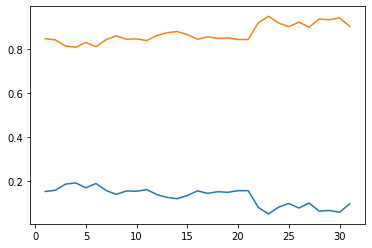

In [202]:
dates = np.arange(1,32)
plt.plot(dates, [tweets_by_day[d]/total_by_day[d] for d in dates])
plt.plot(dates, [retweets_by_day[d]/total_by_day[d] for d in dates])
plt.show()

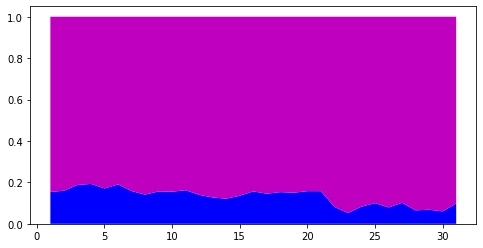

In [207]:
plt.subplots(figsize=(8,4))
plt.stackplot(dates,[[tweets_by_day[d]/total_by_day[d] for d in dates],
                     [retweets_by_day[d]/total_by_day[d] for d in dates]],
              labels=['tweets','retweets'], colors=['b', 'm'])
plt.show()

In [211]:
import json
json.dumps({'name':'masha', 'age':30, 'likes':[1,2,3], 'other':None})

'{"name": "masha", "age": 30, "likes": [1, 2, 3], "other": null}'

In [216]:
d = json.loads(json.dumps({'name':'masha', 'age':30, 'likes':[1,2,3], 'other':None}))
d['name']

'masha'

## Rep Vs Democrat Hashtag Usage
- identify hashtags that are user more by rep vs. democrat states

In [89]:
from scipy.stats import chi2_contingency
import numpy as np

In [58]:
tweets = []
with open('../data/tweets.0301-0331.usa.csv', 'r') as f:
    for line in f:
        if line.startswith('tweetId'):
            continue
        tweets.append(line.split(','))

print(f"loaded {len(tweets)} tweets")

loaded 1022821 tweets


Identify top 200 hashtags overall

In [141]:
from collections import Counter, defaultdict
hashtags = Counter()
hashtag_partisan = defaultdict(lambda: Counter())
hashtag_partisan_by_date = {'republican':defaultdict(lambda: Counter()), 
                           'democrat': defaultdict(lambda: Counter())}
# hashtag_by_date = defaultdict(lambda: Counter())
for tw in tweets:
    date = tw[6]
    
    state = tw[20].strip()
    if state not in state_vote:
        continue
    vote = state_vote[state]
    
    for tag in tw[12].split():
        tag = tag.lower()
        hashtags[tag] += 1
        hashtag_partisan[vote][tag] += 1
        
        hashtag_partisan_by_date[vote][date][tag] += 1
        
#         hashtag_by_date[date][tag] += 1

In [147]:
hashtag_partisan_by_date['democrat'][1']['maga']

89

In [155]:
[str(hashtag_partisan_by_date['democrat'][str(date)][tag]) for tag in selects]

['8', '1', '7', '102', '8', '8', '1', '6', '45', '0']

In [143]:
selects = ['maga', 'toiletpaper', 'economy', 'stayathome', 'chinavirus', 'stayhealthy',
           'pencedemic', 'shelterinplace', 'pandemic', 'votebluenomatterwho']

In [157]:
with open('../data/rep_hashtags_by_date.csv', 'w') as f:
    f.write('state,date,sentiment,total\n')
    f.write('date,' + ','.join(selects) + '\n')
    for date in range(1,32):
        counts = [str(hashtag_partisan_by_date['republican'][str(date)][tag]) for tag in selects]
        f.write(str(date) + ',' + ','.join(counts) + '\n')
        

In [68]:
top200 = [x[0] for x in hashtags.most_common(200)]

In [71]:
hashtag_partisan['republican'].most_common(100)

[('coronavirus', 42163),
 ('covid19', 18230),
 ('covidー19', 8583),
 ('covid_19', 3248),
 ('coronavirusoutbreak', 1970),
 ('covid', 1919),
 ('socialdistancing', 1793),
 ('smartnews', 1692),
 ('coronavirusupdate', 1354),
 ('coronaoutbreak', 1257),
 ('china', 1066),
 ('corona', 1015),
 ('trump', 925),
 ('foxnews', 900),
 ('stayhome', 881),
 ('quarantinelife', 879),
 ('covid2019', 858),
 ('pandemic', 748),
 ('cdc', 712),
 ('coronavirususa', 704),
 ('breaking', 636),
 ('stayathome', 632),
 ('coronaviruspandemic', 627),
 ('news', 557),
 ('health', 552),
 ('coronavirusupdates', 528),
 ('trumpvirus', 526),
 ('maga', 519),
 ('washyourhands', 515),
 ('flattenthecurve', 508),
 ('quarantine', 470),
 ('florida', 386),
 ('coronavirusireland', 373),
 ('coronapocalypse', 371),
 ('supertuesday', 366),
 ('trumpviruscoverup', 355),
 ('iran', 330),
 ('auspol', 330),
 ('chinesevirus', 328),
 ('virus', 327),
 ('lockdown', 322),
 ('publichealth', 321),
 ('usa', 308),
 ('rt', 287),
 ('fbr', 279),
 ('votebluen

In [72]:
hashtag_partisan['democrat'].most_common(100)

[('coronavirus', 73721),
 ('covid19', 33313),
 ('covidー19', 16227),
 ('covid_19', 5758),
 ('coronavirusoutbreak', 3921),
 ('covid', 3564),
 ('coronaoutbreak', 2702),
 ('socialdistancing', 2690),
 ('china', 2660),
 ('coronavirusupdate', 2346),
 ('covid2019', 2343),
 ('pandemic', 1981),
 ('trump', 1923),
 ('corona', 1875),
 ('stayhome', 1490),
 ('coronavirususa', 1483),
 ('coronavirusupdates', 1453),
 ('trumpvirus', 1418),
 ('smartnews', 1407),
 ('quarantinelife', 1311),
 ('news', 1263),
 ('cdc', 1248),
 ('breaking', 1225),
 ('health', 1102),
 ('coronaviruspandemic', 1027),
 ('stayathome', 1026),
 ('trumpviruscoverup', 905),
 ('usa', 905),
 ('coronavirusseattle', 858),
 ('flattenthecurve', 856),
 ('quarantine', 812),
 ('washyourhands', 773),
 ('foxnews', 762),
 ('covid19us', 722),
 ('virus', 719),
 ('nyc', 712),
 ('healthcare', 710),
 ('maga', 695),
 ('wuhan', 681),
 ('supertuesday', 652),
 ('publichealth', 638),
 ('italy', 615),
 ('iran', 612),
 ('coronapocalypse', 606),
 ('coronaalert'

In [85]:
sum(rep.values())

120620

In [86]:
rep = Counter({h:hashtag_partisan['republican'][h] for h in top200})
dem = Counter({h:hashtag_partisan['democrat'][h] for h in top200})
rep_total = sum(rep.values())
dem_total = sum(dem.values())

In [113]:
most_rep = Counter()
most_dem = Counter()

def contingency_table(tag):
    nrep = rep[tag]
    ndem = dem[tag]
    table = np.array([[ndem, dem_total-ndem],
                    [nrep, rep_total-nrep]])
    return table

for tag in top200:
    nrep = rep[tag]
    ndem = dem[tag]
    table = np.array([[ndem, dem_total-ndem],
                    [nrep, rep_total-nrep]])
    
    chi2, p, dof, expected = chi2_contingency(table)
    if table[0,0] > expected[0,0]:
        most_dem[tag] = p
    else:
        most_rep[tag] = p
    

In [140]:
contingency_table('toiletpapercrisis')

array([[   101, 222531],
       [   122, 120498]])

In [117]:
most_rep.most_common()[-50:]

[('coronalockdown', 0.05985370793340057),
 ('socialdistancingnow', 0.04936823799419239),
 ('stayhome', 0.041078721168514465),
 ('hoax', 0.033201860240729575),
 ('lockdown', 0.026037755197373606),
 ('trumpliesaboutcoronavirus', 0.024004980089342463),
 ('gop', 0.021504428011209296),
 ('panicbuying', 0.02131599440749843),
 ('trumpisanidiot', 0.02098783947409908),
 ('trumpdemic', 0.01997222485095329),
 ('coronaviruspandemic', 0.019404786904950226),
 ('stayathome', 0.011728666920296086),
 ('staysafestayhome', 0.01041328446551814),
 ('election2020', 0.009840593445350121),
 ('trumpnotfitforoffice', 0.004840037301868495),
 ('stayhomechallenge', 0.0015240303179346333),
 ('fakenews', 0.001165752785624014),
 ('democrats', 0.0009227781605856232),
 ('trumpcrash', 0.0006829395377531717),
 ('quarentinelife', 0.000381174278609643),
 ('washyourhands', 0.00029560265304909327),
 ('trump2020', 4.4729613718110035e-05),
 ('chinavirus', 4.1065633413049625e-05),
 ('topbuzz', 1.4708184260271738e-05),
 ('cnn', 

In [123]:
most_dem.most_common()[-100:]

[('covid19uk', 0.32293658539852044),
 ('publichealth', 0.29389538702198714),
 ('chinese', 0.29080987351653975),
 ('pence', 0.28847637585602726),
 ('potus', 0.2842159327749406),
 ('cybersecurity', 0.2809546738259695),
 ('media', 0.26956754707735076),
 ('supplychain', 0.26312911386392035),
 ('handsanitizer', 0.2244911243567487),
 ('nba', 0.21437479900056974),
 ('shelterinplace', 0.19802546194153237),
 ('coronavirusus', 0.18457426344949115),
 ('resist', 0.17331297313572647),
 ('sundaythoughts', 0.15380129843099652),
 ('coronacrisis', 0.15380129843099652),
 ('education', 0.14790005367790848),
 ('health', 0.13811217926886812),
 ('coronavid19', 0.11758772575014184),
 ('outbreak', 0.10573351077273535),
 ('maga2020', 0.09739579028668048),
 ('economy', 0.09061535703953678),
 ('markets', 0.08372741384447108),
 ('covidー19', 0.0626782905729234),
 ('covid19usa', 0.05919407764278662),
 ('wuhancoronavirus', 0.05559253286386272),
 ('trumppandemic', 0.051885410255341706),
 ('breakingnews', 0.0350858683

In [ ]:
def contingency(data):

    allwords = set()
    for src,words in data.items():
        allwords.update(words)

    allwords = {w:i for i,w in enumerate(list(allwords))}
    N = len(allwords)
    
    table = np.zeros((len(data),N))
    for i,(src,words) in enumerate(data.items()):
        for w in list(words):
            table[i][allwords[w]] += 1
    return table

    
# For each head-relation tuple, run a chi-square test
# to find how much word usage is contingent on the source
hrs_different = Counter()
for hr, counts in hr_counter.items():
    cont = contingency(counts)
    chi2, p, dof, expected = chi2_contingency(cont)
    hrs_different[hr] = p

print(len(hrs_different))

## Retweets

In [162]:
edges = Counter()
edges[('one', 'two')] += 1
edges[('one', 'three')] += 1

for (source, target), cnt in edges.items():
    print(source, target, cnt)

one two 1
one three 1


In [160]:
import json
with open('../data/coronavirus-tweet-id-2020-03-21-03.jsonl', 'r') as f:
    for line in f:
        data = json.loads(line.strip())
        if 'retweeted_status' in data:
            print(data)
            break

{'contributors': None, 'in_reply_to_user_id_str': None, 'display_text_range': [0, 132], 'retweet_count': 109, 'user': {'translator_type': 'none', 'profile_sidebar_border_color': 'C0DEED', 'time_zone': None, 'friends_count': 978, 'name': '🌊💙Gerard Ramos', 'profile_image_url': 'http://pbs.twimg.com/profile_images/1081757024600223744/t_2CVEER_normal.jpg', 'screen_name': 'jenningsghv2', 'contributors_enabled': False, 'entities': {'description': {'urls': []}}, 'follow_request_sent': False, 'is_translation_enabled': False, 'is_translator': False, 'geo_enabled': False, 'profile_banner_extensions_alt_text': None, 'verified': False, 'protected': False, 'utc_offset': None, 'profile_sidebar_fill_color': 'DDEEF6', 'id': 27819475, 'has_extended_profile': True, 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_color': 'C0DEED', 'profile_image_extensions_alt_text': None, 'lang': None, 'profile_image_url_https': 'https://pbs.twimg.com/profile_image

In [190]:
import gzip

bad = []
with gzip.open('../data/retweets.0301-0307.csv.gz', 'rt', encoding='utf-8') as f:
    for line in f:
        if line.startswith('tweetId'):
            continue

        tweet = line.split(',')
        tweet[-1] = tweet[-1].strip() # remove the newline char
        if len(tweet) != 16:
            bad.append(tweet)

In [192]:
bad

[['1234150297519284224',
  '1233867835971121153',
  '3302638123',
  'Doubur1',
  '2020',
  '3',
  '1',
  '6',
  '16',
  '15',
  '0:00:00',
  '',
  '',
  'Edmonton alberta'],
 ['', '', ''],
 ['1235979771751915522',
  '1235905982015954945',
  '194940345',
  'redsquirrel13',
  '2020',
  '3',
  '6',
  '4',
  '17',
  '25',
  '0:00:00',
  '',
  '',
  'Market Harborough'],
 ['', '', '']]